In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
"""Test the message passing module."""
import pytest
import torch
import rootutils

rootutils.setup_root("./", indicator=".project-root", pythonpath=True)
from topobenchmarkx.transforms.liftings.graph2simplicial import SimplicialCliqueLifting
from topobenchmarkx.io.load.loaders import manual_graph, manual_simple_graph

class TestSimplicialCliqueLifting:
    """Test the SimplicialCliqueLifting class."""
    def setup_method(self):
        # Load the graph
        self.data = manual_simple_graph()
        
        # Initialise the SimplicialCliqueLifting class
        self.lifting_signed = SimplicialCliqueLifting(complex_dim=3, signed=True)
        self.lifting_unsigned = SimplicialCliqueLifting(complex_dim=3, signed=False)
    
    def test_lift_topology(self):
        # Test the lift_topology method
        lifted_data_signed = self.lifting_signed.forward(self.data.clone())
        lifted_data_unsigned = self.lifting_unsigned.forward(self.data.clone())

        expected_incidence_1 = torch.tensor(
            [[-1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
            [ 1.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
            [ 0.,  1.,  0.,  0.,  1.,  0., -1., -1., -1., -1.,  0.,  0.,  0.],
            [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -1.,  0.,  0.],
            [ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
            [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., -1., -1.],
            [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.],
            [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]]
        )
        
        assert (abs(expected_incidence_1) == lifted_data_unsigned.incidence_1.to_dense()).all(), "Something is wrong with unsigned incidence_1 (nodes to edges)."
        assert (expected_incidence_1 == lifted_data_signed.incidence_1.to_dense()).all(), "Something is wrong with signed incidence_1 (nodes to edges)."
        
        expected_incidence_2 = torch.tensor(
            [[ 1.,  1.,  0.,  0.,  0.,  0.],
            [-1.,  0.,  1.,  1.,  0.,  0.],
            [ 0., -1., -1.,  0.,  0.,  0.],
            [ 0.,  0.,  0., -1.,  0.,  0.],
            [ 1.,  0.,  0.,  0.,  1.,  0.],
            [ 0.,  1.,  0.,  0., -1.,  0.],
            [ 0.,  0.,  0.,  0.,  0.,  0.],
            [ 0.,  0.,  1.,  0.,  1.,  0.],
            [ 0.,  0.,  0.,  0.,  0.,  1.],
            [ 0.,  0.,  0.,  1.,  0., -1.],
            [ 0.,  0.,  0.,  0.,  0.,  0.],
            [ 0.,  0.,  0.,  0.,  0.,  0.],
            [ 0.,  0.,  0.,  0.,  0.,  1.]]
        )

        assert (abs(expected_incidence_2) == lifted_data_unsigned.incidence_2.to_dense()).all(), "Something is wrong with unsigned incidence_2 (edges to triangles)."
        assert (expected_incidence_2 == lifted_data_signed.incidence_2.to_dense()).all(), "Something is wrong with signed incidence_2 (edges to triangles)."

        expected_incidence_3 = torch.tensor(
            [[-1.],
            [ 1.],
            [-1.],
            [ 0.],
            [ 1.],
            [ 0.]]
        )

        assert (abs(expected_incidence_3) == lifted_data_unsigned.incidence_3.to_dense()).all(), "Something is wrong with unsigned incidence_3 (triangles to tetrahedrons)."
        assert (expected_incidence_3 == lifted_data_signed.incidence_3.to_dense()).all(), "Something is wrong with signed incidence_3 (triangles to tetrahedrons)."
    
    def test_lifted_features_signed(self):
        # Test the lift_features method for signed case
        lifted_data = self.lifting_signed.forward(self.data)

        expected_features_1 = torch.tensor(
            [[   4],
            [   9],
            [  99],
            [4999],
            [   5],
            [  95],
            [  40],
            [  90],
            [ 490],
            [4990],
            [ 950],
            [ 500],
            [4500]]
        )

        assert (expected_features_1 == lifted_data.x_1).all(), "Something is wrong with x_1 features."

        expected_features_2 = torch.tensor(
            [[0.],
            [0.],
            [0.],
            [0.],
            [0.],
            [0.]]
        )

        assert (expected_features_2 == lifted_data.x_2).all(), "Something is wrong with x_2 features."

        excepted_features_3 = torch.tensor(
            [[0.]]
        )

        assert (excepted_features_3 == lifted_data.x_3).all(), "Something is wrong with x_3 features."
    
    def test_lifted_features_unsigned(self):
        # Test the lift_features method for unsigned case
        lifted_data = self.lifting_unsigned.forward(self.data)

        expected_features_1 = torch.tensor(
            [[   6.],
            [  11.],
            [ 101.],
            [5001.],
            [  15.],
            [ 105.],
            [  60.],
            [ 110.],
            [ 510.],
            [5010.],
            [1050.],
            [1500.],
            [5500.]]
        )

        assert (expected_features_1 == lifted_data.x_1).all(), "Something is wrong with x_1 features."

        expected_features_2 = torch.tensor(
            [[   32.],
            [  212.],
            [  222.],
            [10022.],
            [  230.],
            [11020.]]
        )

        assert (expected_features_2 == lifted_data.x_2).all(), "Something is wrong with x_2 features."

        excepted_features_3 = torch.tensor(
            [[696.]]
        )

        assert (excepted_features_3 == lifted_data.x_3).all(), "Something is wrong with x_3 features."

In [3]:
test = TestSimplicialCliqueLifting()
test.setup_method()
test.test_lift_topology()
test.test_lifted_features_signed()
test.test_lifted_features_unsigned()


/usr/local/lib/python3.11/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [31]:
"""Test the message passing module."""
import pytest
import torch
import rootutils

rootutils.setup_root("./", indicator=".project-root", pythonpath=True)
from topobenchmarkx.transforms.liftings.graph2simplicial import SimplicialNeighborhoodLifting
from topobenchmarkx.io.load.loaders import manual_graph, manual_simple_graph

class TestSimplicialNeighborhoodLifting:
    """Test the SimplicialNeighborhoodLifting class."""
    def setup_method(self):
        # Load the graph
        self.data = manual_simple_graph()
        
        # Initialise the SimplicialNeighborhoodLifting class
        self.lifting_signed = SimplicialNeighborhoodLifting(complex_dim=3, signed=True)
        self.lifting_unsigned = SimplicialNeighborhoodLifting(complex_dim=3, signed=False)
    
    def test_lift_topology(self):
        # Test the lift_topology method
        lifted_data_signed = self.lifting_signed.forward(self.data.clone())
        lifted_data_unsigned = self.lifting_unsigned.forward(self.data.clone())
        expected_incidence_1 = torch.tensor(
            [[-1., -1., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [ 1.,  0.,  0.,  0.,  0.,  0., -1., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0., -1., -1., -1.,  -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.],
             [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.],
             [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0., -1., -1.,  0.],
             [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0., -1.],
             [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.]]
            )
        
        assert (abs(expected_incidence_1) == lifted_data_unsigned.incidence_1.to_dense()).all(), "Something is wrong with unsigned incidence_1 (nodes to edges)."
        assert (expected_incidence_1 == lifted_data_signed.incidence_1.to_dense()).all(), "Something is wrong with signed incidence_1 (nodes to edges)."
        
        expected_incidence_2 = torch.tensor(
            [[ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [-1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [ 0., -1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [ 0.,  0., -1.,  0.,  0.,  0., -1.,  0.,  0., -1.,  0.,  0.,  1.,  1., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [ 0.,  0.,  0., -1.,  0.,  0.,  0., -1.,  0.,  0., -1.,  0., -1.,  0., 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.,  0.,  0., -1.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0., -1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0., -1.,  0.,  0., -1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0., -1.,  0.,  0., -1.,  0., -1.,  0.,  1.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0., -1.,  0.,  0., -1.,  0., -1., -1.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1., 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0., 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0., 0., -1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
             [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., 0.,  0.,  0., -1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
             [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
             [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.],
             [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0., 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  1.,  1.,  0.,  0.],
             [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
             [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 1.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  0.,  0.],
             [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0., 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
             [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0., 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0., -1.,  0.],
             [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
             [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1., -1.],
             [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]])
        
        assert (abs(expected_incidence_2) == lifted_data_unsigned.incidence_2.to_dense()).all(), "Something is wrong with unsigned incidence_2 (edges to triangles)."
        assert (expected_incidence_2 == lifted_data_signed.incidence_2.to_dense()).all(), "Something is wrong with signed incidence_2 (edges to triangles)."

    def test_lifted_features_signed(self):
        # Test the lift_features method for signed case
        lifted_data = self.lifting_signed.forward(self.data)

        expected_features_1 = torch.tensor([[4.0000e+00],
                                            [9.0000e+00],
                                            [4.9000e+01],
                                            [9.9000e+01],
                                            [4.9900e+02],
                                            [4.9990e+03],
                                            [5.0000e+00],
                                            [4.5000e+01],
                                            [9.5000e+01],
                                            [4.9500e+02],
                                            [4.9950e+03],
                                            [4.0000e+01],
                                            [9.0000e+01],
                                            [4.9000e+02],
                                            [9.9000e+02],
                                            [4.9900e+03],
                                            [5.0000e+01],
                                            [4.5000e+02],
                                            [9.5000e+02],
                                            [4.9500e+03],
                                            [4.0000e+02],
                                            [4.9000e+03],
                                            [5.0000e+02],
                                            [4.5000e+03],
                                            [4.0000e+03]])
        
        assert (expected_features_1 == lifted_data.x_1).all(), "Something is wrong with x_1 features."

        expected_features_2 = torch.tensor([[0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.],
                                            [0.]])

        assert (expected_features_2 == lifted_data.x_2).all(), "Something is wrong with x_2 features."

    
    def test_lifted_features_unsigned(self):
        # Test the lift_features method for unsigned case
        lifted_data = self.lifting_unsigned.forward(self.data)

        expected_features_1 = torch.tensor([[   6.], #(0,1)
                                            [  11.], #(0,2)
                                            [  51.], #(0,3)
                                            [ 101.], #(0,4)
                                            [ 501.], #(0,5)
                                            [5001.], #(0,7)
                                            [  15.], #(1,2)
                                            [  55.], #(1,3)
                                            [ 105.], #...
                                            [ 505.],
                                            [5005.],
                                            [  60.],
                                            [ 110.],
                                            [ 510.],
                                            [1010.],
                                            [5010.],
                                            [ 150.],
                                            [ 550.],
                                            [1050.],
                                            [5050.],
                                            [ 600.],
                                            [5100.],
                                            [1500.],
                                            [5500.],
                                            [6000.]])
        
        assert (expected_features_1 == lifted_data.x_1).all(), "Something is wrong with x_1 features."

        expected_features_2 = torch.tensor([[   32.], #(0,1,2)
                                            [  112.], #(0,1,3)
                                            [  212.], #...
                                            [ 1012.],
                                            [10012.],
                                            [  122.],
                                            [  222.],
                                            [ 1022.],
                                            [10022.],
                                            [  302.],
                                            [ 1102.],
                                            [10102.],
                                            [ 1202.],
                                            [10202.],
                                            [11002.],
                                            [  130.],
                                            [  230.],
                                            [ 1030.],
                                            [10030.],
                                            [  310.],
                                            [ 1110.],
                                            [10110.],
                                            [ 1210.],
                                            [10210.],
                                            [11010.],
                                            [  320.],
                                            [ 1120.],
                                            [ 2120.],
                                            [10120.],
                                            [ 1220.],
                                            [10220.],
                                            [ 3020.],
                                            [11020.],
                                            [12020.],
                                            [ 1300.],
                                            [10300.],
                                            [ 3100.],
                                            [11100.],
                                            [11200.],
                                            [13000.]])

        assert (expected_features_2 == lifted_data.x_2).all(), "Something is wrong with x_2 features."

In [32]:
test = TestSimplicialNeighborhoodLifting()
test.setup_method()
test.test_lift_topology()
test.test_lifted_features_signed()
test.test_lifted_features_unsigned()


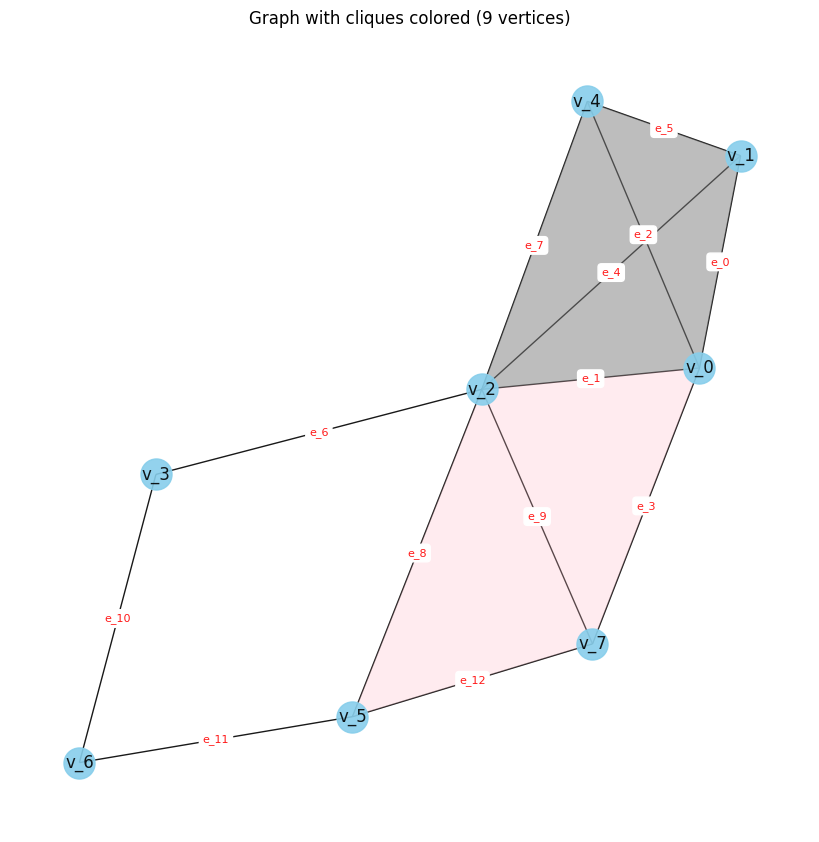

In [11]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Collect vertices
vertices = [i for i in range(data.x.shape[0])]

# Collect edges
edges = []
edge_mapper = {}
for edge_idx, edge in enumerate(abs(data.incidence_1.to_dense().T)):
    node_idxs = torch.where(edge != 0)[0].numpy()
    
    edges.append(torch.where(edge != 0)[0].numpy())
    edge_mapper[edge_idx] = sorted(node_idxs)


# Collect triangles
triangles = []
triangle_mapper = {}
for triangle_idx, triangle in enumerate(abs(data.incidence_2.to_dense().T)):
    edge_idxs = torch.where(triangle != 0)[0].numpy()
    
    nodes = []
    for edge_idx in edge_idxs:
        nodes += (edge_mapper[edge_idx])
    
    triangle_mapper[triangle_idx] = {
        'edge_idxs': sorted(edge_idxs),
        'node_idxs': sorted(list(set(nodes)))
                                    
    }
    
    triangles.append(sorted(list(set(nodes))))

# Collect tetraherdons
tetrahedrons = []
tetrahedron_mapper = {}
for tetrahedron_idx, tetrahedron in enumerate(abs(data.incidence_3.to_dense().T)):
    triangle_idxs = torch.where(tetrahedron != 0)[0].numpy()
    
    nodes = []
    edges_in_tetrahedrons = []
    for triangle_idx in triangle_idxs:
        nodes += (triangle_mapper[triangle_idx]['node_idxs'])
        edges_in_tetrahedrons += (triangle_mapper[triangle_idx]['edge_idxs'])
    
    tetrahedron_mapper[tetrahedron_idx] = {
        'triangle_idxs': sorted(triangle_idxs),
        'edge_idxs': sorted(list(set(edges_in_tetrahedrons))),
        'node_idxs': sorted(list(set(nodes)))
                                    
    }   
    
    tetrahedrons.append(sorted(list(set(nodes))))

edges = np.array(edges)
triangles = np.array(triangles)
tetrahedrons = np.array(tetrahedrons)

# Create a graph
G = nx.Graph()

# Add vertices
G.add_nodes_from(vertices)

# Add edges
G.add_edges_from(edges)

# Plot the graph with edge indices using other layout
pos = nx.spring_layout(G, seed=42)
#pos[3] = np.array([0.15539556, 0.25])

# Draw the graph with labels
nx.draw(
    G,
    pos,
    labels={i: f"v_{i}" for i in G.nodes()},
    node_size=500,
    node_color="skyblue",
    font_size=12,
    edge_color='black', 
    width=1, 
    linewidths=1,
    alpha=0.9,
    
)

# Color the faces (triangles) of the graph
face_color_map = {
    0: "pink",
    1: "gray",
    2: "blue",
    3: "blue",
    4: "orange",
    5: "purple",
    6: "red",
    7: "brown",
    8: "black",
    9: "gray",
}

for i, clique in enumerate(triangles):
    # Get the face color:
    # Calculate to how many tetrahedrons cique belongs
    # Then assign the color to the face
    counter = 0
    for tetrahedron in tetrahedrons:
        from itertools import combinations

        for comb in combinations(tetrahedron, 3):
            if set(clique) == set(comb):
                counter += 1

    polygon = [pos[v] for v in clique]
    poly = Polygon(
        polygon,
        closed=True,
        facecolor=face_color_map[counter],
        #edgecolor="pink",
        alpha=0.3,
    )
    plt.gca().add_patch(poly)



# Draw edges with different color and thickness
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={tuple(corr_nodes): f'e_{edge_idx}' for edge_idx, corr_nodes in edge_mapper.items()},
    font_color='red',
    alpha=0.9,
    font_size=8,
    rotate=False,
    horizontalalignment='center',
    verticalalignment='center'
)


plt.title("Graph with cliques colored (9 vertices)")
plt.axis('off')
plt.show()


# Trial to plot labels of polygons
# # Draw the graph with labels
# nx.draw(
#     G,
#     pos,
#     labels={i: f"v_{i}" for i in G.nodes()},
#     node_size=500,
#     node_color="skyblue",
#     font_size=12,
#     edge_color='black', 
#     width=1, 
#     linewidths=1,
#     alpha=0.9,
    
# )

# for i, clique in enumerate(triangles):
#     # Get the face color:
#     # Calculate to how many tetrahedrons cique belongs
#     # Then assign the color to the face
#     counter = 0
#     for tetrahedron in tetrahedrons:
#         from itertools import combinations

#         for comb in combinations(tetrahedron, 3):
#             if set(clique) == set(comb):
#                 counter += 1

#     polygon = [pos[v] for v in clique]
#     poly = Polygon(
#         polygon,
#         closed=True,
#         facecolor=face_color_map[counter],
#         #edgecolor="pink",
#         alpha=0.3,
#     )
#     plt.gca().add_patch(poly)

# # Add edge indices
# for i, d in triangle_mapper.items():
#     u, v, z = triangle_mapper[i]['node_idxs']
#     x = (pos[u][0] + pos[v][0] + pos[z][0] ) / 3
#     y = (pos[u][1] + pos[v][1] + pos[z][1]) / 3
#     plt.text(x, y, f"t_{i}", fontsize=10, color="r", ha='center',  # Horizontal alignment
#     va='center')
    
# plt.title("Graph with cliques colored (9 vertices)")
# plt.axis('off')
# plt.show()

In [5]:
assert (abs(data.incidence_1.to_dense()) == torch.tensor([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])).all(), 'Something is wrong with the incidence_1'

RuntimeError: The size of tensor a (13) must match the size of tensor b (16) at non-singleton dimension 1